📊 Regressione lineare:
- R² solo Nutella: 0.04
- R² Nutella + Gelato: 0.51


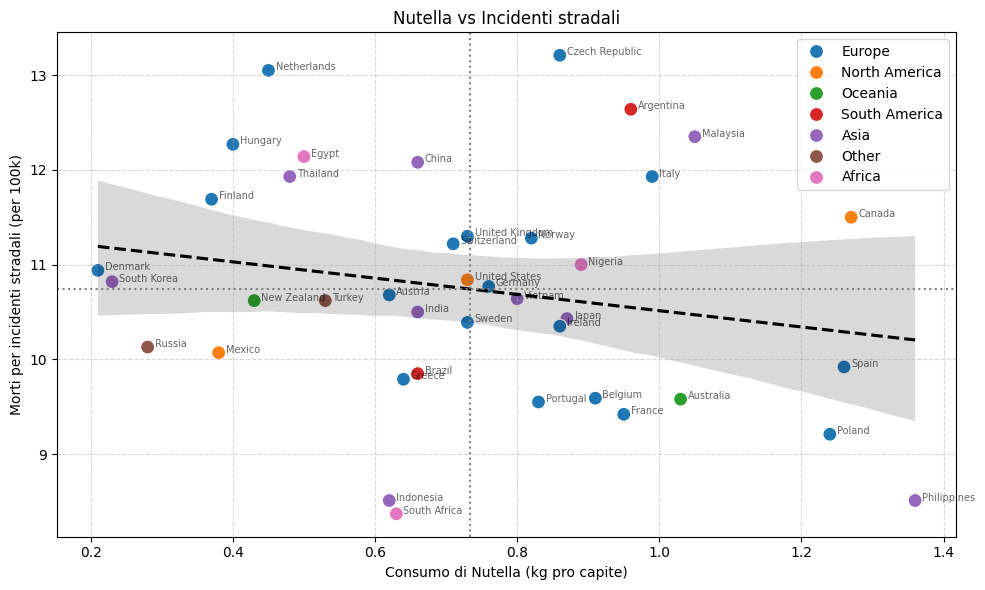

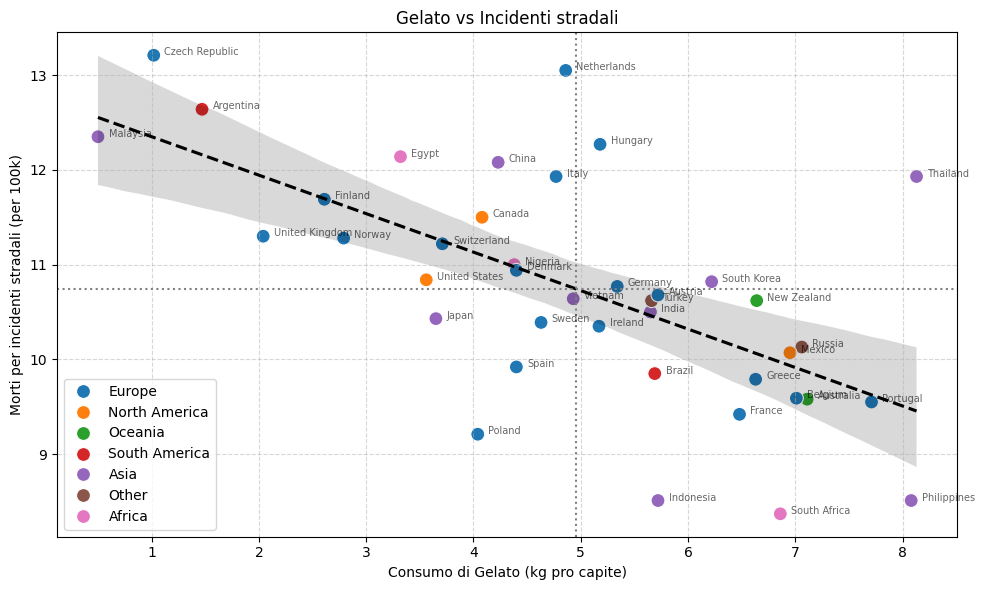

/var/folders/s4/xzb7r1r17l55g8h_bp7068gr0000gn/T/ipykernel_9680/3644710793.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_both.columns, y=importances, palette="coolwarm")


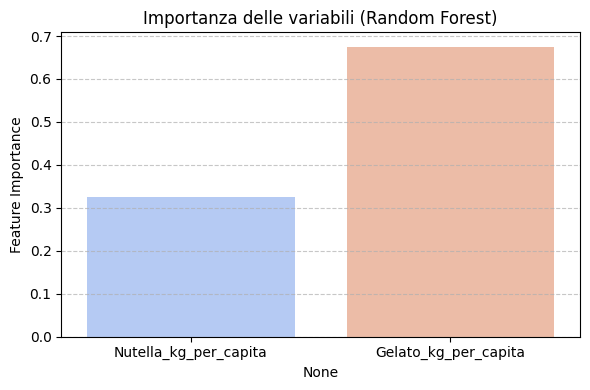

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv("nutella_gelato_incidenti.csv")


continent_map = {
    "Europe": ["France", "Germany", "Italy", "Spain", "United Kingdom", "Netherlands", "Belgium", "Austria", "Switzerland",
               "Sweden", "Norway", "Finland", "Greece", "Portugal", "Poland", "Hungary", "Czech Republic", "Ireland", "Denmark"],
    "Asia": ["China", "India", "Japan", "South Korea", "Indonesia", "Philippines", "Vietnam", "Thailand", "Malaysia"],
    "North America": ["United States", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina"],
    "Africa": ["South Africa", "Nigeria", "Egypt"],
    "Oceania": ["Australia", "New Zealand"]
}

def assign_continent(country):
    for cont, countries in continent_map.items():
        if country in countries:
            return cont
    return "Other"

df["Continent"] = df["Country"].apply(assign_continent)


X_nutella = df[["Nutella_kg_per_capita"]]
X_both = df[["Nutella_kg_per_capita", "Gelato_kg_per_capita"]]
y = df["Road_deaths_per_100k"]

lr_nutella = LinearRegression().fit(X_nutella, y)
lr_both = LinearRegression().fit(X_both, y)

r2_nutella = lr_nutella.score(X_nutella, y)
r2_both = lr_both.score(X_both, y)


print("📊 Regressione lineare:")
print(f"- R² solo Nutella: {r2_nutella:.2f}")
print(f"- R² Nutella + Gelato: {r2_both:.2f}")


rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_both, y)
importances = rf.feature_importances_


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Nutella_kg_per_capita", y="Road_deaths_per_100k",
                hue="Continent", palette="tab10", s=100)
sns.regplot(data=df, x="Nutella_kg_per_capita", y="Road_deaths_per_100k",
            scatter=False, color="black", line_kws={"linestyle": "--"})
plt.axhline(df["Road_deaths_per_100k"].mean(), color="gray", linestyle="dotted")
plt.axvline(df["Nutella_kg_per_capita"].mean(), color="gray", linestyle="dotted")
for i in range(len(df)):
    plt.text(df["Nutella_kg_per_capita"][i]+0.01, df["Road_deaths_per_100k"][i],
             df["Country"][i], fontsize=7, alpha=0.6)
plt.title("Nutella vs Incidenti stradali")
plt.xlabel("Consumo di Nutella (kg pro capite)")
plt.ylabel("Morti per incidenti stradali (per 100k)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Gelato_kg_per_capita", y="Road_deaths_per_100k",
                hue="Continent", palette="tab10", s=100)
sns.regplot(data=df, x="Gelato_kg_per_capita", y="Road_deaths_per_100k",
            scatter=False, color="black", line_kws={"linestyle": "--"})
plt.axhline(df["Road_deaths_per_100k"].mean(), color="gray", linestyle="dotted")
plt.axvline(df["Gelato_kg_per_capita"].mean(), color="gray", linestyle="dotted")
for i in range(len(df)):
    plt.text(df["Gelato_kg_per_capita"][i]+0.1, df["Road_deaths_per_100k"][i],
             df["Country"][i], fontsize=7, alpha=0.6)
plt.title("Gelato vs Incidenti stradali")
plt.xlabel("Consumo di Gelato (kg pro capite)")
plt.ylabel("Morti per incidenti stradali (per 100k)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
sns.barplot(x=X_both.columns, y=importances, palette="coolwarm")
plt.title("Importanza delle variabili (Random Forest)")
plt.ylabel("Feature Importance")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


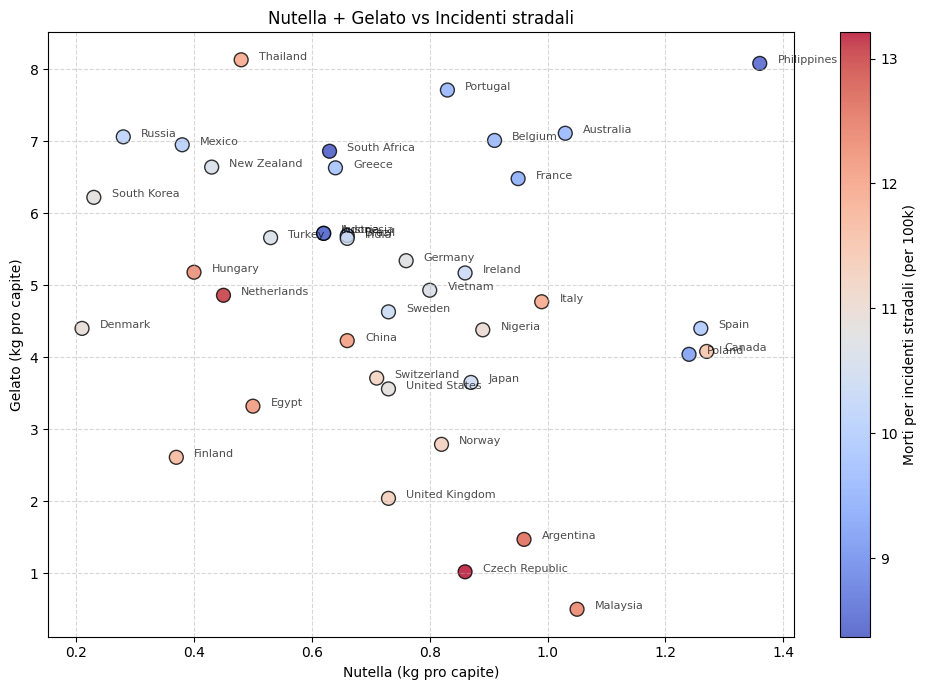

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df["Nutella_kg_per_capita"],
    df["Gelato_kg_per_capita"],
    c=df["Road_deaths_per_100k"],
    cmap="coolwarm",
    s=100,
    alpha=0.8,
    edgecolors="k"
)


for i in range(len(df)):
    plt.text(
        df["Nutella_kg_per_capita"][i] + 0.03,
        df["Gelato_kg_per_capita"][i],
        df["Country"][i],
        fontsize=8,
        alpha=0.7
    )


plt.xlabel("Nutella (kg pro capite)")
plt.ylabel("Gelato (kg pro capite)")
plt.title("Nutella + Gelato vs Incidenti stradali")
cbar = plt.colorbar(scatter)
cbar.set_label("Morti per incidenti stradali (per 100k)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
